In [4]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s._set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from IPython.display import display

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# 1. a.)

In [20]:
x = np.loadtxt('../../ml4s/data/Ising2D_config_L30.dat.gz')
y = np.loadtxt('../../ml4s/data/Ising2D_labels_L30.dat')
Tval = np.loadtxt('../../ml4s/data/Ising2D_temps_L30.dat')

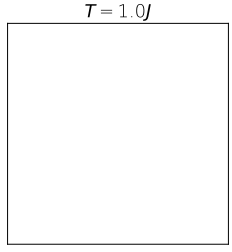

In [21]:
from IPython.display import clear_output,display
from time import sleep

fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(4,4))

L = 30
for i,cx in enumerate(x[::50]):

    clear_output(wait=True)
    fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(4,4))
    img = ax.matshow(cx.reshape(L,L), cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_title(f'$T = {Tval[50*i]:.1f}J$')
    plt.pause(0.01)

    plt.show()

In [22]:
train_perc = .8

valid_perc = .1

test_perc = .1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1 - train_perc)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = test_perc / (test_perc + valid_perc))

In [23]:
def one_hot(y_0):
    
    y_hot = []
    
    for y in y_0:
        
        if (y == 0):
            
            y_hot.append([0, 1])
        
        else:
            
            y_hot.append([1, 0])
            
    y_hot = np.array(y_hot)
    
    return y_hot

y_train_hot = one_hot(y_train)

y_test_hot = one_hot(y_test)

y_val_hot = one_hot(y_val)

# b.)

In [28]:
model = keras.Sequential(
[
    layers.Dense(100, input_shape=(len(x[0]),), activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               90100     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                

Epoch 1/10
400/400 - 1s - loss: 2.3594e-07 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9981
Epoch 2/10
400/400 - 1s - loss: 2.4381e-07 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.9981
Epoch 3/10
400/400 - 1s - loss: 4.7706e-07 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 0.9975
Epoch 4/10
400/400 - 1s - loss: 9.7165e-08 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 0.9975
Epoch 5/10
400/400 - 1s - loss: 1.6137e-07 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 0.9981
Epoch 6/10
400/400 - 1s - loss: 4.0185e-08 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9975
Epoch 7/10
400/400 - 1s - loss: 7.1426e-08 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 0.9975
Epoch 8/10
400/400 - 1s - loss: 9.2320e-08 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9975
Epoch 9/10
400/400 - 1s - loss: 6.2924e-07 - accuracy: 1.0000 - val_loss: 0.0142 - val_accuracy: 0.9969
Epoch 10/10
400/400 - 1s - loss: 3.1894e-08 - accuracy: 1.0000 -

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


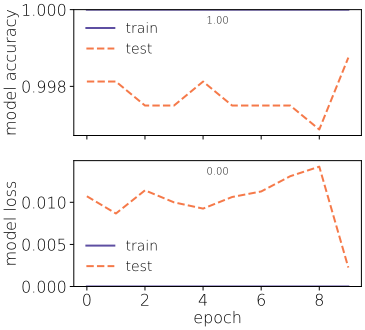

In [31]:
batch_size = 32
epochs = 10

training = {}
training = model.fit(x_train, y_train_hot, epochs=epochs, validation_data=(x_test,y_test_hot), verbose=2)

# look into training history
fig,ax = plt.subplots(2,1, sharex=True, figsize=(5,5))

score = model.evaluate(x_test, y_test_hot, verbose=0);

# accuracy
ax[0].plot(training.history['accuracy'], color=colors[0])
ax[0].plot(training.history['val_accuracy'], ls='--', color=colors[-3])
ax[0].set_ylabel('model accuracy')
ax[0].legend(['train', 'test'], loc='best')
ax[0].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', 
                         transform=ax[0].transAxes)
ax[0].set_ylim(top=1)

# loss
ax[1].plot(training.history['loss'], color=colors[0])
ax[1].plot(training.history['val_loss'], ls='--', color=colors[-3])
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].set_ylim(bottom=0)
ax[1].text(0.5,0.95,f'{score[0]:.2f}',horizontalalignment='center',verticalalignment='top', 
                         transform=ax[1].transAxes)
ax[1].legend(['train', 'test'], loc='best');

My neural network is approaching 100% effectiveness. I suppose I might be overfitting somewhat, since my training model accuracy is consistently higher than my testing accuracy, but the difference is on the order of .1% so any overfitting is not really significant.

I am very sorry, but this is all I am getting done on this homework. I have been, and still am, very busy with my final project for this class and with preparing for a presentation tomorrow, and I did not get much sleep last night. I am hoping that this assignment grade can be dropped, as stipulated on the class syllabus.